### EXERCICE 1

In [3]:
import pandas as pd

rc=pd.read_csv("src/chipotle.csv")

rc


,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,1,Izze,[Clementine],$3.39
2,2,1,1,Nantucket Nectar,[Apple],$3.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...,...
4617,4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [9]:
rc.iloc[0:11,:]
rc.head(10)


,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,1,Izze,[Clementine],$3.39
2,2,1,1,Nantucket Nectar,[Apple],$3.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,6,3,1,Side of Chips,NaN,$1.69
7,7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [11]:
rc.shape

(4622, 6)

In [13]:
rc.iloc[0:0,:]
rc.columns

Index(['Unnamed: 0', 'order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [27]:
rc.groupby('item_name')['quantity'].sum().sort_values(ascending=False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


In [34]:
rc["quantity"].sum()

4972

In [ ]:
rc['item_price'] = rc['item_price'].str.replace('$','')
rc['item_price'] = rc['item_price'].astype('float')

In [49]:
(rc['item_price']*rc['quantity']).sum().round(2)

39237.02

In [ ]:
revenu=(rc['item_price']*rc['quantity'])
rc.groupby("order_id")['revenu'].sum()
rc.groupby("order_id")['revenu'].sum().mean()




### EXERCICE 2

In [78]:
house_price=pd.read_csv("house_market/house_price.csv")
house_price


,Unnamed: 0,id,house_price
0,0,14,1918154.0
1,1,30,739142.0
2,2,70,1621938.0
3,3,77,1319862.0
4,4,50,146250.0
...,...,...,...
95,95,15,157223.0
96,96,81,1616313.0
97,97,42,143573.0
98,98,19,974546.0


In [79]:
chambres=pd.read_csv("house_market/nombre_de_chambres.csv")
chambres.columns=['id','chambres']
chambres



,id,chambres
0,1,4
1,2,1
2,3,4
3,4,2
4,5,4
...,...,...
94,95,3
95,96,2
96,97,2
97,98,2


In [80]:
sdb=pd.read_csv("house_market/nombre_de_sdb.csv")
sdb.columns=['id','sdb']
sdb

,id,sdb
0,1,1
1,2,1
2,3,3
3,4,1
4,5,3
...,...,...
94,95,3
95,96,1
96,97,1
97,98,1


In [81]:
surface=pd.read_csv("house_market/superficie.csv")
surface.columns=['id','surface']
surface

,id,surface
0,1,27667
1,2,14742
2,3,28089
3,4,11713
4,5,28591
...,...,...
94,95,11417
95,96,12126
96,97,16390
97,98,23738


In [82]:
df=surface.merge(sdb,on='id').merge(chambres,on='id').merge(house_price,on='id')

In [83]:
df.surface.mean()

20354.878787878788

In [84]:
(df.chambres.mean(),df.chambres.median())

(2.4343434343434343, 2.0)

In [85]:
cout_moyen_maison= df.house_price.mean()

In [86]:
df.groupby("chambres")['house_price'].mean()

chambres
1    960723.363636
2    642086.258065
3    645904.592593
4    888045.631579
Name: house_price, dtype: float64

In [87]:
df

,id,surface,sdb,chambres,Unnamed: 0,house_price
0,1,27667,1,4,71,1305091.0
1,2,14742,1,1,65,164373.0
2,3,28089,3,4,88,1441714.0
3,4,11713,1,2,49,108290.0
4,5,28591,3,4,33,1703033.0
...,...,...,...,...,...,...
94,95,11417,3,3,39,132599.0
95,96,12126,1,2,15,155828.0
96,97,16390,1,2,13,237061.0
97,98,23738,1,2,9,976422.0


In [88]:
 df['house_size'] = df['surface'].apply(lambda x : 'very large' if x > 25000
                                                 else 'large' if (x > 20000) and (x <= 25000)                                                      
                                                 else 'medium' if (x > 15000) and (x <= 20000)                                                      
                                                else 'small' if (x > 10000) and (x <= 15000)                                                      
                                                else 'very small')                                                      
display(df)


,id,surface,sdb,chambres,Unnamed: 0,house_price,house_size
0,1,27667,1,4,71,1305091.0,very large
1,2,14742,1,1,65,164373.0,small
2,3,28089,3,4,88,1441714.0,very large
3,4,11713,1,2,49,108290.0,small
4,5,28591,3,4,33,1703033.0,very large
...,...,...,...,...,...,...,...
94,95,11417,3,3,39,132599.0,small
95,96,12126,1,2,15,155828.0,small
96,97,16390,1,2,13,237061.0,medium
97,98,23738,1,2,9,976422.0,large


In [89]:
df.groupby("house_size")['house_price'].mean()

house_size
large         7.325385e+05
medium        3.256948e+05
small         1.561387e+05
very large    1.556667e+06
Name: house_price, dtype: float64

c:\Users\quent\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


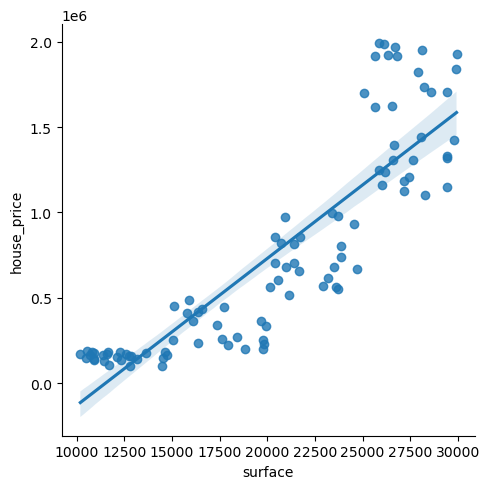

In [90]:
import seaborn as sns
%matplotlib inline
sns.lmplot(x = "surface", y="house_price", data = df)

In [91]:
## Plus la surface de la maison est grande, plus le prix sera élevé.